# Support Vector Machine


In [1]:
import numpy as np
import pandas as pd

from scipy.stats import norm
from sklearn.datasets import make_blobs

from matplotlib import pyplot
import matplotlib.pyplot as plt

import matplotlib.cm as cm
from random import sample

## Generating Some Example Data with 2 Features

In [2]:
n_feature = 2 # the number of features
n_components = 2 # the number of clusters

n = 1000 # the number of total samples

In [3]:
# generate isotropic Gaussian blobs (data from mixture Gaussian distributions)
X, y = make_blobs(n_samples=n, # the number of total samples
                  centers=n_components, # the number of clusters
                  n_features=n_feature, # the number of features
                  cluster_std = [4] * n_components, # the std of each cluster
                  random_state=2) # 2

# X = np.hstack((np.ones((m, 1)), X))

X

array([[  1.9738175 ,  -7.50934555],
       [ -1.19505856,  -5.8378053 ],
       [  0.37631303, -13.57342824],
       ...,
       [ -0.8821049 , -19.09837957],
       [ -2.82660508, -13.01978618],
       [ -0.92520746,  -7.54158259]])

In [4]:
print(y)

y = np.where(y ==0, -1, 1)

print(y)

[1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0
 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1
 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1
 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0
 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1
 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0
 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 1 1 0 0 

In [5]:
for i in range(5):
    print('x =', X[i, ], ', y =', y[i])

x = [ 1.9738175  -7.50934555] , y = 1
x = [-1.19505856 -5.8378053 ] , y = -1
x = [  0.37631303 -13.57342824] , y = -1
x = [-0.58648176 -0.37741265] , y = 1
x = [ 5.5126432  -1.76458642] , y = 1


In [6]:
# Just to show you what is inside it. We print the first 10 elements of this numpy array. 
y[:10]

array([ 1, -1, -1,  1,  1, -1,  1, -1,  1,  1])

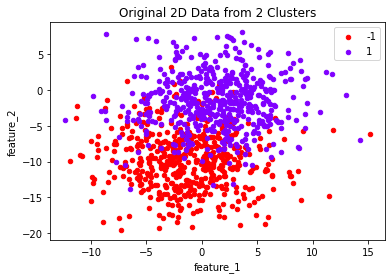

In [7]:
# scatter plot, data points annotated by different colors
df = pd.DataFrame(dict(feature_1=X[:,0], feature_2=X[:,1], label=y))


cluster_name = set(y)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', label=key, color=colors[key].reshape(1,-1))
    
pyplot.title('Original 2D Data from {} Clusters'.format(n_components))
pyplot.show()

In [8]:

# Create Test/Train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Support Vector Machine Using Scikit-learn 


## SVC


# Read for more details the following important documentations


https://scikit-learn.org/stable/modules/svm.html#svm-classification



https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [9]:

from sklearn import svm
from sklearn.metrics import accuracy_score


model = svm.SVC()
model.fit(X_train, y_train)



y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.875


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          -1       0.87      0.89      0.88       104
           1       0.88      0.85      0.87        96

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



## Linear SVC 

## sklearn.svm.LinearSVC

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html


In [56]:
model = svm.LinearSVC(C=.01, max_iter=100, fit_intercept=False)
model.fit(X_train, y_train)

print(dir(model))

print(model.coef_)
print(model.fit_intercept)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))


['C', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'penalty', 'predict', 'random_state', 'score', 'set_params', 'sparsify', 'tol', 'verbose']
[[0.05907893 0.06076751]]
False
Accuracy Score: 0.73


# SVM in Python without libraries (no Scikit-learn) 

# Cost Function 

Hinge Loss function


$$ 
cost = \frac{ \lambda }{ 2 } ||w||^2 + \frac{1}{N} \sum_i^n max(0, 1 - y_i (w \cdot x_i + b )) \\
\text{     Regularization parameter     }  \lambda = \frac{1}{c} 
$$

In [57]:
def compute_cost(X, y, W, regularization_factor):
    '''This function calculate the hinge loss. Primal Problem in SVM'''
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
    
    # This is our max(0, distance). 
    distances[distances < 0] = 0 
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    # This divide by 2 is not important. You can skip doing it 
    # because we want only to check if this cost is going down or not. 
    return (1 / 2 * np.dot(W, W) + hinge_loss)

# Gradient 
$$gradient(w)=\frac{1}{N}\sum_i^n
\begin{cases}
w &  \text{ if } max(0, y_i (w \cdot x_i)) = 0 \\
w - c y_i x_i &  \text{otherwise}
\end{cases}
$$


In [58]:
def calculate_gradient(X, y, W, regularization_factor):
      
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])
        
    distance = 1 - (y * np.dot(X, W))
    
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        
        if (d < 0):
            di = W
        else:
            di = W - (regularization_factor * y[ind] * X[ind])
            
            
        dw += di
    
    dw = dw/len(y)  # average
    
    return dw

In [66]:
weights = np.zeros(2)


# Now we optimize it using Gradient Descent. 
num_iterations = 200
learnin_rate = 0.01

regularization = 0.01

cost_list = []

for i in range(0, num_iterations):
    
    cost = compute_cost(X_train, y_train, weights, regularization)
    
    print("Epoch", i, "Cost is:", cost, "weights", weights)
    
    cost_list.append(cost)
    
    grad = calculate_gradient(X_train, y_train, weights, regularization)
    
    weights = weights - learnin_rate * grad

Epoch 0 Cost is: 0.01 weights [0. 0.]
Epoch 1 Cost is: 0.009981766434693546 weights [0.00013039 0.00040774]
Epoch 2 Cost is: 0.009963895717336696 weights [0.00025949 0.0008114 ]
Epoch 3 Cost is: 0.009946380627255244 weights [0.00038729 0.00121102]
Epoch 4 Cost is: 0.009929214087466411 weights [0.00051381 0.00160664]
Epoch 5 Cost is: 0.009912389161819378 weights [0.00063907 0.00199831]
Epoch 6 Cost is: 0.00989589905219272 weights [0.00076307 0.00238607]
Epoch 7 Cost is: 0.009879737095747633 weights [0.00088583 0.00276994]
Epoch 8 Cost is: 0.009863896762235804 weights [0.00100737 0.00314998]
Epoch 9 Cost is: 0.009848371651360861 weights [0.00112769 0.00352622]
Epoch 10 Cost is: 0.009833155490192327 weights [0.00124681 0.00389869]
Epoch 11 Cost is: 0.009818242130631049 weights [0.00136474 0.00426744]
Epoch 12 Cost is: 0.00980362554692504 weights [0.00148148 0.0046325 ]
Epoch 13 Cost is: 0.009789299833234778 weights [0.00159706 0.00499391]
Epoch 14 Cost is: 0.009775259201246955 weights [0.

Epoch 117 Cost is: 0.009170968063561156 weights [0.00901623 0.02819317]
Epoch 118 Cost is: 0.009169232233789838 weights [0.00905647 0.02831897]
Epoch 119 Cost is: 0.009167530947030968 weights [0.0090963  0.02844352]
Epoch 120 Cost is: 0.009165863515878602 weights [0.00913573 0.02856682]
Epoch 121 Cost is: 0.009164229266606164 weights [0.00917477 0.02868889]
Epoch 122 Cost is: 0.00916262753889425 weights [0.00921341 0.02880973]
Epoch 123 Cost is: 0.0091610576855638 weights [0.00925168 0.02892937]
Epoch 124 Cost is: 0.009159519072314631 weights [0.00928955 0.02904782]
Epoch 125 Cost is: 0.009158011077469117 weights [0.00932705 0.02916508]
Epoch 126 Cost is: 0.00915653309172103 weights [0.00936418 0.02928116]
Epoch 127 Cost is: 0.009155084517889331 weights [0.00940093 0.02939609]
Epoch 128 Cost is: 0.009153664770676879 weights [0.00943732 0.02950986]
Epoch 129 Cost is: 0.00915227327643396 weights [0.00947334 0.0296225 ]
Epoch 130 Cost is: 0.009150909472926473 weights [0.009509   0.0297340

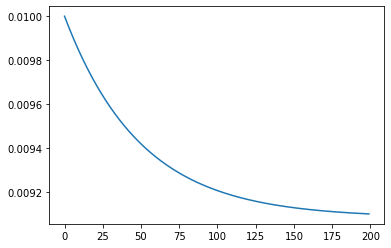

In [67]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [68]:
# Prediction calculculation 
# print(np.dot(X_test, weights))
y_predict_2 = np.where(np.dot(X_test, weights)<0, -1, 1)

y_predict_2

array([-1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1])

In [69]:
def predict_svm(weights, X):
    """
    Predict the class between 0 and 1 using learned SVM parameters weights.
    """    
    return np.where(np.dot(X, weights)<0, -1, 1)

In [70]:
print("Accuracy Score:", accuracy_score(y_test, predict_svm(weights, X_test)))

Accuracy Score: 0.71
